# Modélisation 

Le projet choisit est un sujet de type de la santé en rapport avec la crise sanitaire COVID 19 . Il s'agit d'un apprentissage de type suppervisé d'une problématique de classification de patients présentant de symptomes simmilaires au COVID 19.

Nous mettons en place la variable target : Patient décédé ou non suite à la contraction du virus. 
## Sommaire

### I.	Gathering data 

1. Open data Health 

2. Problématique et identification de données 


### II. ANALYSE EXPLORATOIRE DES DONNEES
1.	Echantillonnage

2.	Features engineering 

3.	Visualisation des données

### III.	PREPARATION DES DONNEES 

1.	Répartition de données en features X et Target Y

    1.1 Features 
    
    1.2 Target 
    
    
2.	Selection des variables

### IV.	MODELISATION 

1. Description du process de modélisation
2.	Hyperparameters tuning

3.	Evaluation 

### V.	CONCLUSION

In [0]:
%sh
#pip install matplotlib
#pip install numpy
#pip install pandas==0.25.1
###conda install -c anaconda basemap
pip install scikit-learn
pip install spark_df_profiling
pip install pydotplus

pip install missingno
pip install graphviz
pip install xgboost 
pip install imblearn
pip install lightgbm
pip install --upgrade scikit-learn

Requirement already satisfied: scikit-learn in /databricks/python3/lib/python3.7/site-packages (0.20.3)
Requirement already satisfied: numpy>=1.8.2 in /databricks/python3/lib/python3.7/site-packages (from scikit-learn) (1.16.2)
Requirement already satisfied: scipy>=0.13.3 in /databricks/python3/lib/python3.7/site-packages (from scikit-learn) (1.2.1)
You are using pip version 19.0.3, however version 20.2.4 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Collecting spark_df_profiling
 Downloading https://files.pythonhosted.org/packages/59/4b/457f5cdc6fa45c345799538f6c3f03349f6ca1045abfd3926d11a9904a3f/spark_df_profiling-1.1.13-py2.py3-none-any.whl (91kB)
Requirement already satisfied: pandas>=0.17.0 in /databricks/python3/lib/python3.7/site-packages (from spark_df_profiling) (0.24.2)
Requirement already satisfied: six>=1.9.0 in /databricks/python3/lib/python3.7/site-packages (from spark_df_profiling) (1.12.0)
Collecting jinja2>=2.8 (from spark_df_profiling)
 Downloading https://files.pythonhosted.org/packages/30/9e/f663a2aa66a09d838042ae1a2c5659828bb9b41ea3a6efa20a20fd92b121/Jinja2-2.11.2-py2.py3-none-any.whl (125kB)
Requirement already satisfied: matplotlib>=1.4 in /databricks/python3/lib/python3.7/site-packages (from spark_df_profiling) (3.0.3)
Requirement already satisfied: numpy>=1.12.0 in /databricks/python3/lib/python3.7/site-packages (from pandas>=0.17.0->spark_df_profiling) (1.16.2)
Requirement already satisfied: python-dateutil>=2.5.0 in /databricks/python3/lib/python3.7/site-packages (from pandas>=0.17.0->spark_df_profiling) (2.8.0)
Requirement already satisfied: pytz>=2011k in /databricks/python3/lib/python3.7/site-packages (from pandas>=0.17.0->spark_df_profiling) (2018.9)
Collecting MarkupSafe>=0.23 (from jinja2>=2.8->spark_df_profiling)
 Downloading https://files.pythonhosted.org/packages/98/7b/ff284bd8c80654e471b769062a9b43cc5d03e7a615048d96f4619df8d420/MarkupSafe-1.1.1-cp37-cp37m-manylinux1_x86_64.whl
Requirement already satisfied: kiwisolver>=1.0.1 in /databricks/python3/lib/python3.7/site-packages (from matplotlib>=1.4->spark_df_profiling) (1.2.0)
Requirement already satisfied: cycler>=0.10 in /databricks/python3/lib/python3.7/site-packages (from matplotlib>=1.4->spark_df_profiling) (0.10.0)
Requirement already satisfied: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in /databricks/python3/lib/python3.7/site-packages (from matplotlib>=1.4->spark_df_profiling) (2.4.7)
Installing collected packages: MarkupSafe, jinja2, spark-df-profiling
Successfully installed MarkupSafe-1.1.1 jinja2-2.11.2 spark-df-profiling-1.1.13
You are using pip version 19.0.3, however version 20.2.4 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Collecting pydotplus
 Downloading https://files.pythonhosted.org/packages/60/bf/62567830b700d9f6930e9ab6831d6ba256f7b0b730acb37278b0ccdffacf/pydotplus-2.0.2.tar.gz (278kB)
Requirement already satisfied: pyparsing>=2.0.1 in /databricks/python3/lib/python3.7/site-packages (from pydotplus) (2.4.7)
Building wheels for collected packages: pydotplus
 Building wheel for pydotplus (setup.py): started
 Building wheel for pydotplus (setup.py): finished with status 'done'
 Stored in directory: /root/.cache/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus
Installing collected packages: pydotplus
Successfully installed pydotplus-2.0.2
You are using pip version 19.0.3, however version 20.2.4 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Collecting missingno
 Downloading https://files.pythonhosted.org/packages/2b/de/6e4dd6d720c49939544352155dc06a08c9f7e4271aa631a559dfbeaaf9d4/missingno-0.4.2-py3-none-any.whl
Requirement already satisfied: matplotlib in /databricks/python3/lib/python3.7/site-packages (from missingno) (3.0.3)
Requirement already satisfied: scipy in /databricks/python3/lib/python3.7/site-packages (from missingno) (1.2.1)
Requiremen

### Importation de librairies

In [0]:
# Import libraries

from sklearn import tree
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,BayesianRidge,Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from statsmodels.api import OLS
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import numpy as np
import pandas as pd
import pydotplus
from re import sub
import scipy.stats as sci
import seaborn as sns
import spark_df_profiling
from pathlib import Path


import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG
from graphviz import Source
import itertools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#imports
#basics
import pandas as pd
import numpy as np
import random
from math import sqrt
from scipy.stats import gaussian_kde

#sklearn tools
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.manifold import TSNE
from sklearn.impute import KNNImputer
from sklearn.model_selection import StratifiedKFold
#classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
#regressions
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb
#plotting
import matplotlib.pyplot as plt
import seaborn as sns

#set options
pd.options.display.max_columns = None
pd.options.display.max_rows = None
 
# Set visualization prefrences 
sns.set(font_scale=1.5, style="darkgrid")
pd.set_option('display.max_columns', None)

## 1. Gathering data

### Open data Health 

Plusieurs open data Heath de la santé ont été rendus publiques pendant la crise sanitaire pour permettre aux chercheurs de comprendre la propahgation de la maladie et aussi faciliter la recherche médicale du vaccin. 

Voici une lise non exhautive de quelques open data : 

- https://covid19researchdatabase.org 
- https://datasetsearch.research.google.com 
- https://www.kaggle.com/imdevskp/corona-virus-report
- https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge
- https://www.kaggle.com/c/stanford-covid-vaccine
- https://www.worldometers.info/coronavirus/ 

- https://coronavirus.jhu.edu/us-map
- https://www.ecdc.europa.eu/en/covid-19/data 
- https://healthdata.gov 
- https://www.re3data.org
- http://www.chdstudies.org/research/information_for_researchers.php
- http://leo.ugr.es/elvira/DBCRepository/
- https://seer.cancer.gov/explorer/
- http://www.oasis-brains.org
- https://www.reddit.com/r/datasets/

Nous avons constitué un dataset à partir de ces données
- https://www.imperial.ac.uk/media/imperial-college/medicine/sph/ide/gida-fellowships/ 
- https://www.imperial.ac.uk/media/imperial-college/medicine/sph/ide/gida-fellowships/subset_international_cases_2020_03_11.csv
- https://brunods10.s3-us-west-2.amazonaws.com/MIT_COVID/latestdata.csv

In [0]:


#Importing "merged" file from table. This file contains the input data for the program.

# File location and type
file_location = "/FileStore/tables/df_dummy2.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

## import merged file 
# The applied options are for CSV files. For other file types, these will be ignored.
df_dummy = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)




### Problématique et identification de données

-  L'identifier les données de santé permettant de caractériser un patient atteint du COVID 19. 
- 	L’implémentation de ces algorithmes de machine Learning capables d’apprendre à partir de données et de déterminer la probabilité du décès du patient pour pouvoir identifier les patients fragiles et éviter les morts par négligeance.

### II. ANALYSE EXPLORATOIRE DES DONNEES

### Echantillonnage

In [0]:
## transformer pyspark dataframe à pandas dataframe 
pandas_df_dummy = df_dummy.toPandas()


In [0]:
pandas_df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3912 entries, 0 to 3911
Data columns (total 50 columns):
_c0 3912 non-null int32
id 3912 non-null object
sex 3912 non-null object
age 3912 non-null object
country 3912 non-null object
symptoms 3912 non-null object
outcome 3912 non-null object
date_onset_symptoms 3912 non-null object
date_admission_hospital 3912 non-null object
date_death_or_discharge 3912 non-null object
date_confirmation 3912 non-null object
continent 3912 non-null object
other_unspecified 3912 non-null int32
cough 3912 non-null int32
fever 3912 non-null int32
dyspnea 3912 non-null int32
other_respiratory 3912 non-null int32
fatigue 3912 non-null int32
myalgia 3912 non-null int32
other_neurological 3912 non-null int32
emesis 3912 non-null int32
other_systemic 3912 non-null int32
other_gastrointestinal 3912 non-null int32
asthenia 3912 non-null int32
other_muscoloskeletal 3912 non-null int32
pneumonia 3912 non-null int32
rhinorrhea 3912 non-null int32
pharyngitis 3912 non-null int32
other_musculoskeletal 3912 non-null int32
other_ocular 3912 non-null int32
nausea 3912 non-null int32
other_muscoluskeletal 3912 non-null int32
malaise 3912 non-null int32
ILI 3912 non-null int32
pain 3912 non-null int32
ARDS 3912 non-null int32
sepsis 3912 non-null int32
other_cardiovascular 3912 non-null int32
AKD 3912 non-null int32
organ.failure 3912 non-null int32
days_to_event 3912 non-null int32
dead 3912 non-null int32
hospitalized 3912 non-null int32
outcome2 280 non-null object
Admission 3912 non-null int32
Recovery 3912 non-null int32
Death 3912 non-null int32
time_til_admission 3912 non-null object
time_til_recovery 3912 non-null object
time_til_death 3912 non-null object
dtypes: int32(35), object(15)
memory usage: 993.4+ KB

Nous avons les variables du dataset contenant les symptômes des patients, les caractérisques socio, le pays ... 

Parmi les variables : 

- pneumonia: une infection aiguë des voies aériennes inférieures caractérisée par une atteinte inflammatoire, voire purulente, du parenchyme pulmonaire (bronchioles, alvéoles pulmonaires et interstitium pulmonaire).

- rhinorrhea :  un écoulement nasal. Ce terme médical désigne la morve. La rhinorrhée peut survenir à la suite d'un traumatisme, d'un os comportant un ou plusieurs sinus aériens en communication avec les fosses nasales. On a par exemple l'éthmoïde, le sphénoïde,   l'os frontal entre autres.



-  ILI : Une infection respiratoire aiguë avec: fièvre mesurée ≥ 38 C°, toux. 

- ARDS : Syndrome de détresse respiratoire aigu : Le syndrome de détresse respiratoire aigu (ARDS) est un état potentiellement fatal où les poumons ne peuvent pas fournir assez d'oxygène aux  organes vitaux du fuselage.

In [0]:
pandas_df_dummy.head()

,_c0,id,sex,age,country,symptoms,outcome,date_onset_symptoms,date_admission_hospital,date_death_or_discharge,date_confirmation,continent,other_unspecified,cough,fever,dyspnea,other_respiratory,fatigue,myalgia,other_neurological,emesis,other_systemic,other_gastrointestinal,asthenia,other_muscoloskeletal,pneumonia,rhinorrhea,pharyngitis,other_musculoskeletal,other_ocular,nausea,other_muscoluskeletal,malaise,ILI,pain,ARDS,sepsis,other_cardiovascular,AKD,organ.failure,days_to_event,dead,hospitalized,outcome2,Admission,Recovery,Death,time_til_admission,time_til_recovery,time_til_death
0,1,34,female,49,China,"chest discomfort, cough, fever",discharged,2019-12-23,2019-12-27,2020-01-16,NA,Asia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,0,1,discharged,1,1,0,4,24,NA
1,2,60,female,15,China,"dyspnea, respiratory stress",died,2019-12-10,2019-12-31,NA,NA,Asia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,1,1,died,1,0,1,21,NA,NA
2,3,61,male,66,China,"cough, fatigue, fever, headache",died,2020-01-10,2020-01-16,2020-01-20,NA,Asia,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,1,1,died,1,0,1,6,NA,10
3,4,62,female,48,China,"cough, fatigure, fever, little sputum, muscula...",died,2019-12-10,2019-12-10,2020-01-20,NA,Asia,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41,1,1,died,1,0,1,0,NA,41
4,5,63,male,89,China,dyspnea,died,2020-01-13,2020-01-18,2020-01-19,NA,Asia,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,1,1,died,1,0,1,5,NA,6


In [0]:
#Define missing data function to identify the total number of missing data and associated percentage 
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [0]:
pandas_df_dummy.shape

Out[8]: (3912, 50)

Nous avons 3912 lignes et 50 colonnes(50 variables)

In [0]:
missing_data(pandas_df_dummy)

,_c0,id,sex,age,country,symptoms,outcome,date_onset_symptoms,date_admission_hospital,date_death_or_discharge,date_confirmation,continent,other_unspecified,cough,fever,dyspnea,other_respiratory,fatigue,myalgia,other_neurological,emesis,other_systemic,other_gastrointestinal,asthenia,other_muscoloskeletal,pneumonia,rhinorrhea,pharyngitis,other_musculoskeletal,other_ocular,nausea,other_muscoluskeletal,malaise,ILI,pain,ARDS,sepsis,other_cardiovascular,AKD,organ.failure,days_to_event,dead,hospitalized,outcome2,Admission,Recovery,Death,time_til_admission,time_til_recovery,time_til_death
Total,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3632,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,92.8425,0,0,0,0,0,0
Types,int32,object,object,object,object,object,object,object,object,object,object,object,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,object,int32,int32,int32,object,object,object


Identifier les variables présentant un pourcentage élévé de données manquantes 

Par exemple, pour la variable : outcome2 3632 lignes manquantes et un pourcentage 92%.

In [0]:
## Identifier les valeurs uniques de la variable outcome2 
pandas_df_dummy['outcome2'].unique()

Out[10]: array(['discharged', 'died', None], dtype=object)

In [0]:
## Identifier les valeurs uniques de la variable dead

pandas_df_dummy['dead'].unique()

Out[11]: array([0, 1])

In [0]:
## Identifier les valeurs uniques de la variable outcome

pandas_df_dummy['outcome'].unique()

Out[12]: array(['discharged', 'died', 'NA', 'discharge', 'Discharged',
 '05.02.2020', 'death', 'stable', 'recovered', 'severe', 'dead',
 'Symptoms only improved with cough. Currently hospitalized for follow-up.',
 'treated in an intensive care unit (14.02.2020)', 'Alive',
 'Recovered', 'Deceased'], dtype=object)

In [0]:
## Identifier les valeurs uniques de la variable Death 
pandas_df_dummy['Death'].unique()

Out[13]: array([0, 1])

In [0]:
## Identifier les valeurs uniques de la variable sex

pandas_df_dummy['sex'].unique()

Out[14]: array(['female', 'male', 'NA'], dtype=object)

In [0]:
## 
## Identifier les valeurs uniques de la variable Admission
pandas_df_dummy['Admission'].unique()


Out[15]: array([1, 0])

In [0]:
# Supprimer les lignes  de valeurs  NAN 
pandas_df_dummy.dropna(how = 'all', inplace = True)

In [0]:

# Dataframe information
pandas_df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3912 entries, 0 to 3911
Data columns (total 50 columns):
_c0 3912 non-null int32
id 3912 non-null object
sex 3912 non-null object
age 3912 non-null object
country 3912 non-null object
symptoms 3912 non-null object
outcome 3912 non-null object
date_onset_symptoms 3912 non-null object
date_admission_hospital 3912 non-null object
date_death_or_discharge 3912 non-null object
date_confirmation 3912 non-null object
continent 3912 non-null object
other_unspecified 3912 non-null int32
cough 3912 non-null int32
fever 3912 non-null int32
dyspnea 3912 non-null int32
other_respiratory 3912 non-null int32
fatigue 3912 non-null int32
myalgia 3912 non-null int32
other_neurological 3912 non-null int32
emesis 3912 non-null int32
other_systemic 3912 non-null int32
other_gastrointestinal 3912 non-null int32
asthenia 3912 non-null int32
other_muscoloskeletal 3912 non-null int32
pneumonia 3912 non-null int32
rhinorrhea 3912 non-null int32
pharyngitis 3912 non-null int32
other_musculoskeletal 3912 non-null int32
other_ocular 3912 non-null int32
nausea 3912 non-null int32
other_muscoluskeletal 3912 non-null int32
malaise 3912 non-null int32
ILI 3912 non-null int32
pain 3912 non-null int32
ARDS 3912 non-null int32
sepsis 3912 non-null int32
other_cardiovascular 3912 non-null int32
AKD 3912 non-null int32
organ.failure 3912 non-null int32
days_to_event 3912 non-null int32
dead 3912 non-null int32
hospitalized 3912 non-null int32
outcome2 280 non-null object
Admission 3912 non-null int32
Recovery 3912 non-null int32
Death 3912 non-null int32
time_til_admission 3912 non-null object
time_til_recovery 3912 non-null object
time_til_death 3912 non-null object
dtypes: int32(35), object(15)
memory usage: 1023.8+ KB

In [0]:
patient_features = ['sex','age','symptoms', 'date_onset_symptoms', 'date_admission_hospital', 'date_death_or_discharge', 'date_confirmation']

geography_features = ['country', 'continent']



Features_Symptoms = ['cough','fever','dyspnea', 'other_respiratory', 'fatigue', 'myalgia', 'other_neurological', 'emesis', 'other_systemic', 'other_gastrointestinal', 'asthenia', 'other_muscoloskeletal', 'pneumonia', 'rhinorrhea', 'pharyngitis', 'other_musculoskeletal', 'other_ocular', 'nausea', 'malaise', 'ILI', 'pain', 'ARDS', 'sepsis', 'other_cardiovascular', 'AKD', 'organ.failure']

structured_features = ['days_to_event', 'dead', 'hospitalized', 'outcome2', 'Admission', 'Recovery', 'Death', 'time_til_admission', 'time_til_recovery', 'time_til_death']

probale_target = ['dead', 'outcome', 'outcome2', 'Death']

In [0]:
### Identifier les types de chaque variable 

pandas_df_dummy.dtypes

Out[19]: _c0 int32
id object
sex object
age object
country object
symptoms object
outcome object
date_onset_symptoms object
date_admission_hospital object
date_death_or_discharge object
date_confirmation object
continent object
other_unspecified int32
cough int32
fever int32
dyspnea int32
other_respiratory int32
fatigue int32
myalgia int32
other_neurological int32
emesis int32
other_systemic int32
other_gastrointestinal int32
asthenia int32
other_muscoloskeletal int32
pneumonia int32
rhinorrhea int32
pharyngitis int32
other_musculoskeletal int32
other_ocular int32
nausea int32
other_muscoluskeletal int32
malaise int32
ILI int32
pain int32
ARDS int32
sepsis int32
other_cardiovascular int32
AKD int32
organ.failure int32
days_to_event int32
dead int32
hospitalized int32
outcome2 object
Admission int32
Recovery int32
Death int32
time_til_admission object
time_til_recovery object
time_til_death object
dtype: object

In [0]:
# Comparaison de la proportion entre la variable Death et outcome2 
print('NAs in Death: ', pandas_df_dummy['Death'].isna().sum())
print('NAs in outcome2: ', pandas_df_dummy['outcome2'].isna().sum())

print('% different Death: ', sum(pandas_df_dummy['Death']!=pandas_df_dummy['outcome2'])/pandas_df_dummy.shape[0]*100)



NAs in Death: 0
NAs in outcome2: 3632
% different Death: 100.0

In [0]:
#Vérifier le pourcentage maximal   NA restantes  
round(np.max(pandas_df_dummy.isna().sum())/pandas_df_dummy.shape[0]*100,2)

Out[21]: 92.84

In [0]:
for feature in Features_Symptoms:
  pandas_df_dummy[feature] = pandas_df_dummy[feature]*1000/pandas_df_dummy['pneumonia']

In [0]:
# Verifier toutes les variables et rassurer qu'elles soient numériques.
pandas_df_dummy[pandas_df_dummy.columns[~pandas_df_dummy.columns.isin(probale_target)]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3912 entries, 0 to 3911
Data columns (total 46 columns):
_c0 3912 non-null int32
id 3912 non-null object
sex 3912 non-null object
age 3912 non-null object
country 3912 non-null object
symptoms 3912 non-null object
date_onset_symptoms 3912 non-null object
date_admission_hospital 3912 non-null object
date_death_or_discharge 3912 non-null object
date_confirmation 3912 non-null object
continent 3912 non-null object
other_unspecified 3912 non-null int32
cough 580 non-null float64
fever 916 non-null float64
dyspnea 204 non-null float64
other_respiratory 199 non-null float64
fatigue 223 non-null float64
myalgia 194 non-null float64
other_neurological 157 non-null float64
emesis 151 non-null float64
other_systemic 191 non-null float64
other_gastrointestinal 176 non-null float64
asthenia 174 non-null float64
other_muscoloskeletal 150 non-null float64
pneumonia 150 non-null float64
rhinorrhea 150 non-null float64
pharyngitis 150 non-null float64
other_musculoskeletal 150 non-null float64
other_ocular 150 non-null float64
nausea 150 non-null float64
other_muscoluskeletal 3912 non-null int32
malaise 150 non-null float64
ILI 150 non-null float64
pain 150 non-null float64
ARDS 150 non-null float64
sepsis 150 non-null float64
other_cardiovascular 150 non-null float64
AKD 150 non-null float64
organ.failure 150 non-null float64
days_to_event 3912 non-null int32
hospitalized 3912 non-null int32
Admission 3912 non-null int32
Recovery 3912 non-null int32
time_til_admission 3912 non-null object
time_til_recovery 3912 non-null object
time_til_death 3912 non-null object
dtypes: float64(26), int32(7), object(13)
memory usage: 1.3+ MB

In [0]:
pandas_df_dummy.head()

,_c0,id,sex,age,country,symptoms,outcome,date_onset_symptoms,date_admission_hospital,date_death_or_discharge,date_confirmation,continent,other_unspecified,cough,fever,dyspnea,other_respiratory,fatigue,myalgia,other_neurological,emesis,other_systemic,other_gastrointestinal,asthenia,other_muscoloskeletal,pneumonia,rhinorrhea,pharyngitis,other_musculoskeletal,other_ocular,nausea,other_muscoluskeletal,malaise,ILI,pain,ARDS,sepsis,other_cardiovascular,AKD,organ.failure,days_to_event,dead,hospitalized,outcome2,Admission,Recovery,Death,time_til_admission,time_til_recovery,time_til_death
0,1,34,female,49,China,"chest discomfort, cough, fever",discharged,2019-12-23,2019-12-27,2020-01-16,NA,Asia,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,0,1,discharged,1,1,0,4,24,NA
1,2,60,female,15,China,"dyspnea, respiratory stress",died,2019-12-10,2019-12-31,NA,NA,Asia,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,1,1,died,1,0,1,21,NA,NA
2,3,61,male,66,China,"cough, fatigue, fever, headache",died,2020-01-10,2020-01-16,2020-01-20,NA,Asia,1,inf,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,1,1,died,1,0,1,6,NA,10
3,4,62,female,48,China,"cough, fatigure, fever, little sputum, muscula...",died,2019-12-10,2019-12-10,2020-01-20,NA,Asia,0,inf,inf,NaN,inf,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,1,1,died,1,0,1,0,NA,41
4,5,63,male,89,China,dyspnea,died,2020-01-13,2020-01-18,2020-01-19,NA,Asia,0,NaN,NaN,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,1,1,died,1,0,1,5,NA,6


In [0]:
## Remplacer NA par NaN 
pandas_df_dummy['time_til_recovery'] = pandas_df_dummy['time_til_recovery'].replace(['NA'],'NaN')
pandas_df_dummy['time_til_death'] = pandas_df_dummy['time_til_death'].replace(['NA'],'NaN')
pandas_df_dummy['time_til_admission'] = pandas_df_dummy['time_til_admission'].replace(['NA'],'NaN')
pandas_df_dummy['age'] = pandas_df_dummy['age'].replace(['NA'],'NaN')
pandas_df_dummy['sex'] = pandas_df_dummy['sex'].replace(['NA'],'NaN')

In [0]:
### Faire un group By 
pandas_df_dummy_outcome2_Death = pandas_df_dummy.groupby('outcome2')['Death'].sum().reset_index()

In [0]:

## Supprimer les variales non censées 
pandas_df_dummy = pandas_df_dummy.drop(['_c0', 'symptoms', 'date_onset_symptoms', 'date_admission_hospital', 'date_death_or_discharge', 'date_confirmation', 'continent', 'country'], axis=1)

### Analyse de la variable target 

Variable Target Death : La variable prend 0 pour non décès du patient et 1 pour les patients décédés

In [0]:
pandas_df_dummy['Death'].unique()

Out[28]: array([0, 1])

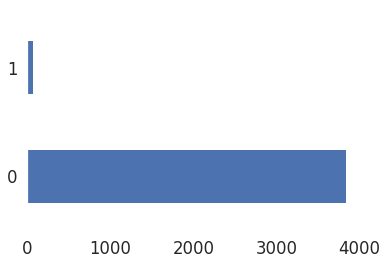

In [0]:
## Répartition de la variable target Death (décès)
pandas_df_dummy['Death'].value_counts().plot.barh()

In [0]:
## Regrouper les variables par rapport à la target 

percent_target = pandas_df_dummy.groupby('Death').count()
percent_target['percent'] = 100*(percent_target['age']/pandas_df_dummy['Death'].count())
percent_target.reset_index(level=0, inplace=True)
percent_target

,Death,id,sex,age,outcome,other_unspecified,cough,fever,dyspnea,other_respiratory,fatigue,myalgia,other_neurological,emesis,other_systemic,other_gastrointestinal,asthenia,other_muscoloskeletal,pneumonia,rhinorrhea,pharyngitis,other_musculoskeletal,other_ocular,nausea,other_muscoluskeletal,malaise,ILI,pain,ARDS,sepsis,other_cardiovascular,AKD,organ.failure,days_to_event,dead,hospitalized,outcome2,Admission,Recovery,time_til_admission,time_til_recovery,time_til_death,percent
0,0,3840,3840,3840,3840,3840,543,867,182,188,207,181,145,141,180,166,164,140,140,140,140,140,140,140,3840,140,140,140,140,140,140,140,140,3840,3840,3840,208,3840,3840,3840,3840,3840,98.159509
1,1,72,72,72,72,72,37,49,22,11,16,13,12,10,11,10,10,10,10,10,10,10,10,10,72,10,10,10,10,10,10,10,10,72,72,72,72,72,72,72,72,72,1.840491


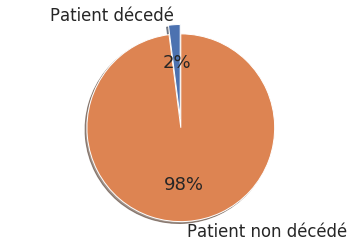

In [0]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Patient décedé','Patient non décédé'
sizes = [2, 98]
explode = (0.1, 0)  # only "explode" the 1st slice (i.e. 'Toxic contents')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()



Nous avons 98% de patients non décédés et 2 % de patients décédés dans notre échantillon

### Features engineering

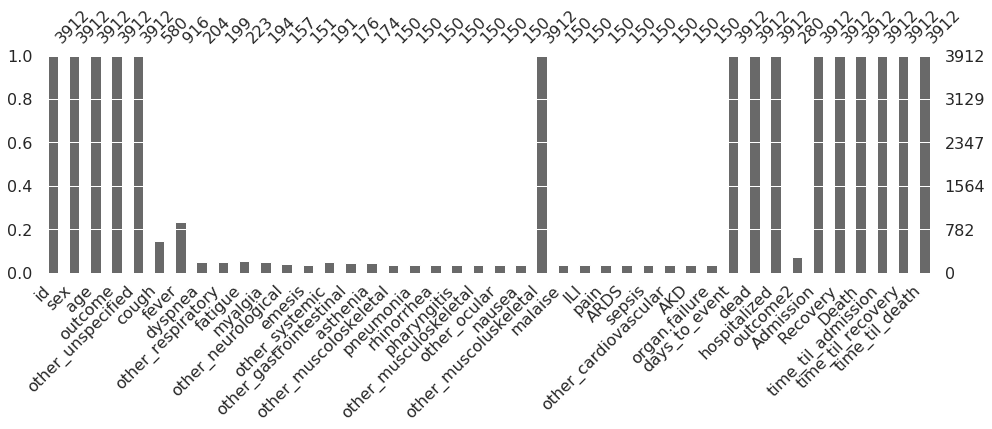

In [0]:
# les valeurs manquantes 
msno.bar(pandas_df_dummy, figsize=(16, 4))

In [0]:
## Remplacer les valeurs manquantes par la moyenne 

pandas_df_dummy = pandas_df_dummy.fillna(pandas_df_dummy.mean())

In [0]:
(pandas_df_dummy.isnull().sum() == pandas_df_dummy.shape[0]).any()

Out[34]: False

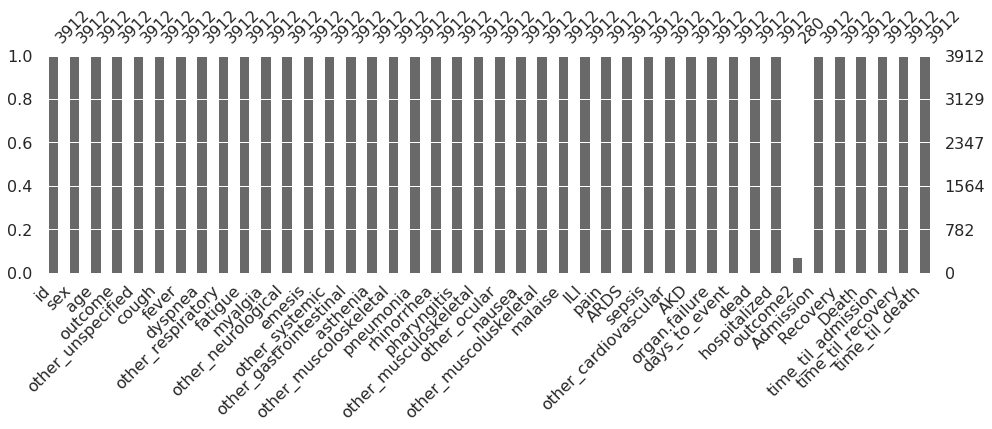

In [0]:
msno.bar(pandas_df_dummy, figsize=(16, 4))

In [0]:
pandas_df_dummy.head()

,id,sex,age,outcome,other_unspecified,cough,fever,dyspnea,other_respiratory,fatigue,myalgia,other_neurological,emesis,other_systemic,other_gastrointestinal,asthenia,other_muscoloskeletal,pneumonia,rhinorrhea,pharyngitis,other_musculoskeletal,other_ocular,nausea,other_muscoluskeletal,malaise,ILI,pain,ARDS,sepsis,other_cardiovascular,AKD,organ.failure,days_to_event,dead,hospitalized,outcome2,Admission,Recovery,Death,time_til_admission,time_til_recovery,time_til_death
0,34,female,49,discharged,0,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,0.0,1000.0,0.013333,0.1,0.013333,0.0,0.013333,0,0.013333,0.0,0.0,0.02,0.0,0.0,0.0,0.0,24,0,1,discharged,1,1,0,4,24,NaN
1,60,female,15,died,0,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,0.0,1000.0,0.013333,0.1,0.013333,0.0,0.013333,0,0.013333,0.0,0.0,0.02,0.0,0.0,0.0,0.0,21,1,1,died,1,0,1,21,NaN,NaN
2,61,male,66,died,1,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,0.0,1000.0,0.013333,0.1,0.013333,0.0,0.013333,0,0.013333,0.0,0.0,0.02,0.0,0.0,0.0,0.0,10,1,1,died,1,0,1,6,NaN,10
3,62,female,48,died,0,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,0.0,1000.0,0.013333,0.1,0.013333,0.0,0.013333,0,0.013333,0.0,0.0,0.02,0.0,0.0,0.0,0.0,41,1,1,died,1,0,1,0,NaN,41
4,63,male,89,died,0,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,0.0,1000.0,0.013333,0.1,0.013333,0.0,0.013333,0,0.013333,0.0,0.0,0.02,0.0,0.0,0.0,0.0,6,1,1,died,1,0,1,5,NaN,6


In [0]:
(pandas_df_dummy.isnull().sum() == pandas_df_dummy.shape[0]).any()

Out[37]: False

In [0]:
full_null_data = (pandas_df_dummy.isnull().sum() == pandas_df_dummy.shape[0])
full_null_columns = full_null_data[full_null_data == True].index

In [0]:
## colonnes avec toutes les valeurs égales à 0  

print(full_null_columns.tolist())

[]

In [0]:
pandas_df_dummy.drop(full_null_columns, axis=1, inplace=True)

In [0]:
(pandas_df_dummy.isnull().sum() / pandas_df_dummy.shape[0]).sort_values(ascending=False).head()

Out[41]: outcome2 0.928425
time_til_death 0.000000
fatigue 0.000000
pneumonia 0.000000
other_muscoloskeletal 0.000000
dtype: float64

In [0]:
contain_null_series = (pandas_df_dummy.isnull().sum() != 0).index

In [0]:
not_null_series = (pandas_df_dummy.isnull().sum() == 0)
not_null_columns = not_null_series[not_null_series == True].index
not_null_columns = not_null_columns[1:]

In [0]:
#drop_cols = ['id','_c0', 'dead', 'outcome2', 'outcome', 'time_til_recovery', 'time_til_death']
df = pandas_df_dummy 
pandas_df_dummy = pandas_df_dummy.drop(['dead', 'outcome2', 'outcome', 'time_til_recovery', 'time_til_death'], axis=1)

### Visualisation des données

In [0]:
cols = pandas_df_dummy.columns.drop('id')

pandas_df_dummy[cols] = pandas_df_dummy[cols].apply(pd.to_numeric, errors='coerce')

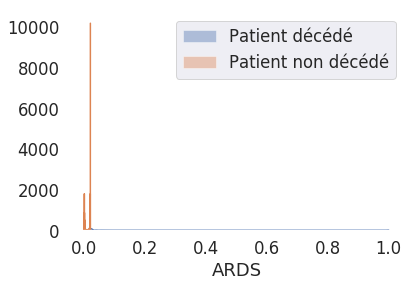

In [0]:
sns.distplot(pandas_df_dummy[pandas_df_dummy['Death'] == 1]['ARDS'], label="Patient décédé")
sns.distplot(pandas_df_dummy[pandas_df_dummy['Death'] == 0]['ARDS'], label="Patient non décédé")
plt.legend()

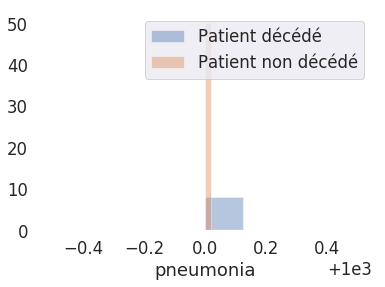

In [0]:
sns.distplot(pandas_df_dummy[pandas_df_dummy['Death'] == 1]['pneumonia'], label="Patient décédé")
sns.distplot(pandas_df_dummy[pandas_df_dummy['Death'] == 0]['pneumonia'], label="Patient non décédé")
plt.legend()

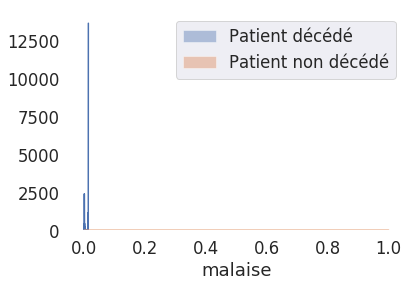

In [0]:
sns.distplot(pandas_df_dummy[pandas_df_dummy['Death'] == 1]['malaise'], label="Patient décédé")
sns.distplot(pandas_df_dummy[pandas_df_dummy['Death'] == 0]['malaise'], label="Patient non décédé")
plt.legend()

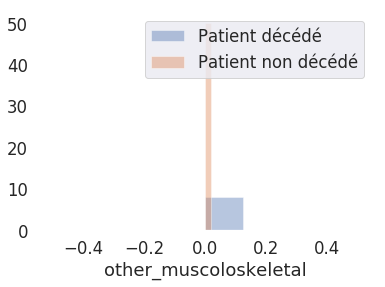

In [0]:

sns.distplot(pandas_df_dummy[pandas_df_dummy['Death'] == 1]['other_muscoloskeletal'], label="Patient décédé")
sns.distplot(pandas_df_dummy[pandas_df_dummy['Death'] == 0]['other_muscoloskeletal'], label="Patient non décédé")
plt.legend()

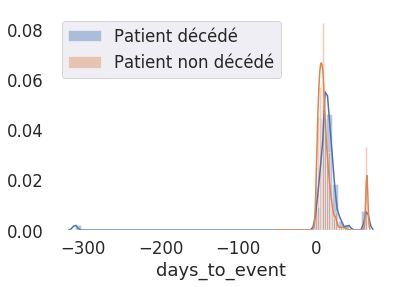

In [0]:

sns.distplot(pandas_df_dummy[pandas_df_dummy['Death'] == 1]['days_to_event'], label="Patient décédé")
sns.distplot(pandas_df_dummy[pandas_df_dummy['Death'] == 0]['days_to_event'], label="Patient non décédé")
plt.legend()

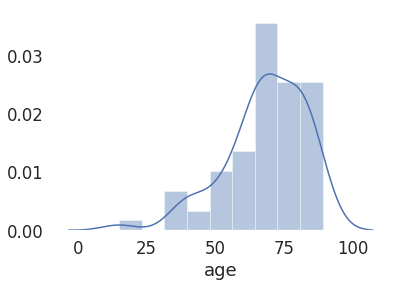

In [0]:

sns.distplot(pandas_df_dummy[pandas_df_dummy['Death'] == 1]['age'], label="Patient décédé")
sns.distplot(pandas_df_dummy[pandas_df_dummy['Death'] == 0]['age'], label="Patient non décédé")
plt.legend()

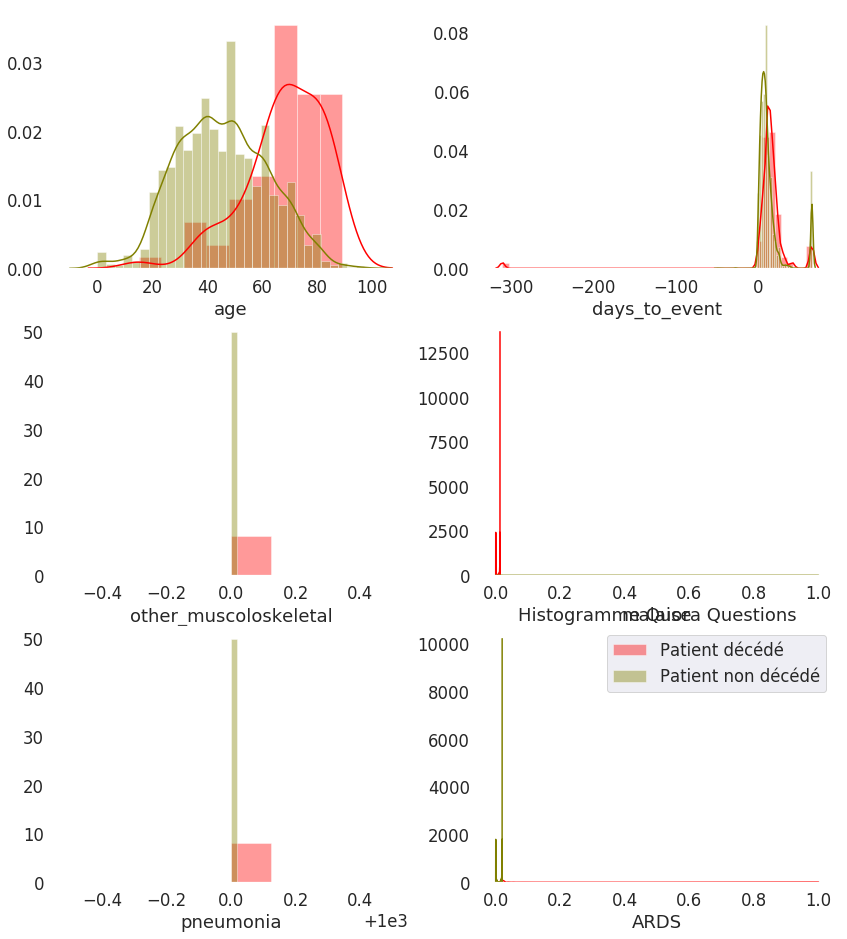

In [0]:
list_var=['age', 'days_to_event', 'other_muscoloskeletal', 
          'malaise', 'pneumonia', 'ARDS']
def var_hist_global(df,X='Death',Y=list_var, Title='Features Engineering - Histograms', KDE=False):
    fig, ((ax1, ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3, 2 ,figsize=(14,16))#, sharey=True )
    aX = [ax1, ax2,ax3,ax4,ax5,ax6]
    for i in range(len(list_var)):   
        sns.distplot( df[list_var[i]][df[X]== 1 ].dropna(), label="Patient décédé" , ax= aX[i], kde= KDE , color = 'red')           
        sns.distplot( df[list_var[i]][df[X]== 0 ].dropna(), label="Patient non décédé"   , ax= aX[i], kde= KDE , color = "olive")
    plt.legend()
    plt.title(Title)
    plt.show()
    #plt.savefig("Features_Engineering_Histograms")
    
var_hist_global(df=pandas_df_dummy,X='Death',Y=list_var, Title='Histogramme Quora Questions', KDE=True)

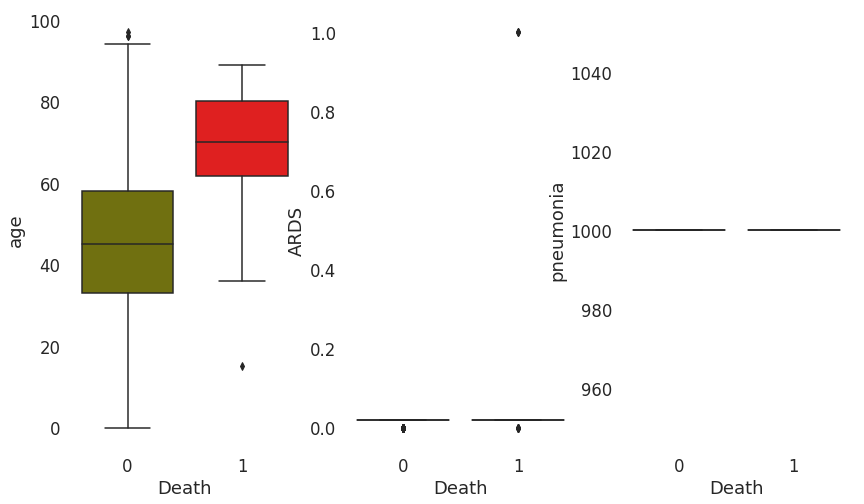

In [0]:
# Calculate number of obs per group & median to position labels
list_var = ['age', 'ARDS', 'pneumonia']
def violin_boxplott(df,X='Death',Y=list_var, Title='Features Engineering - Box plot'): 
    fig, (ax1, ax2 ,ax3) = plt.subplots(1,3 ,figsize=(14,8))#, sharey=True )
    medians = pandas_df_dummy.groupby(['Death'])['age', 'ARDS', 'pneumonia'].median().values
 
    sns.boxplot( y=list_var[0],  x=X , data = df, ax= ax1 , palette=['olive','red'])
    sns.boxplot( y=list_var[1],  x=X , data = df, ax= ax2 , palette=['olive','red'])
    sns.boxplot( y=list_var[2],  x=X , data = df, ax= ax3 , palette=['olive','red'])
    #plt.title(Title)
    plt.show()
    #plt.savefig("Features_Engineering_Boxplot")
violin_boxplott(df=pandas_df_dummy)

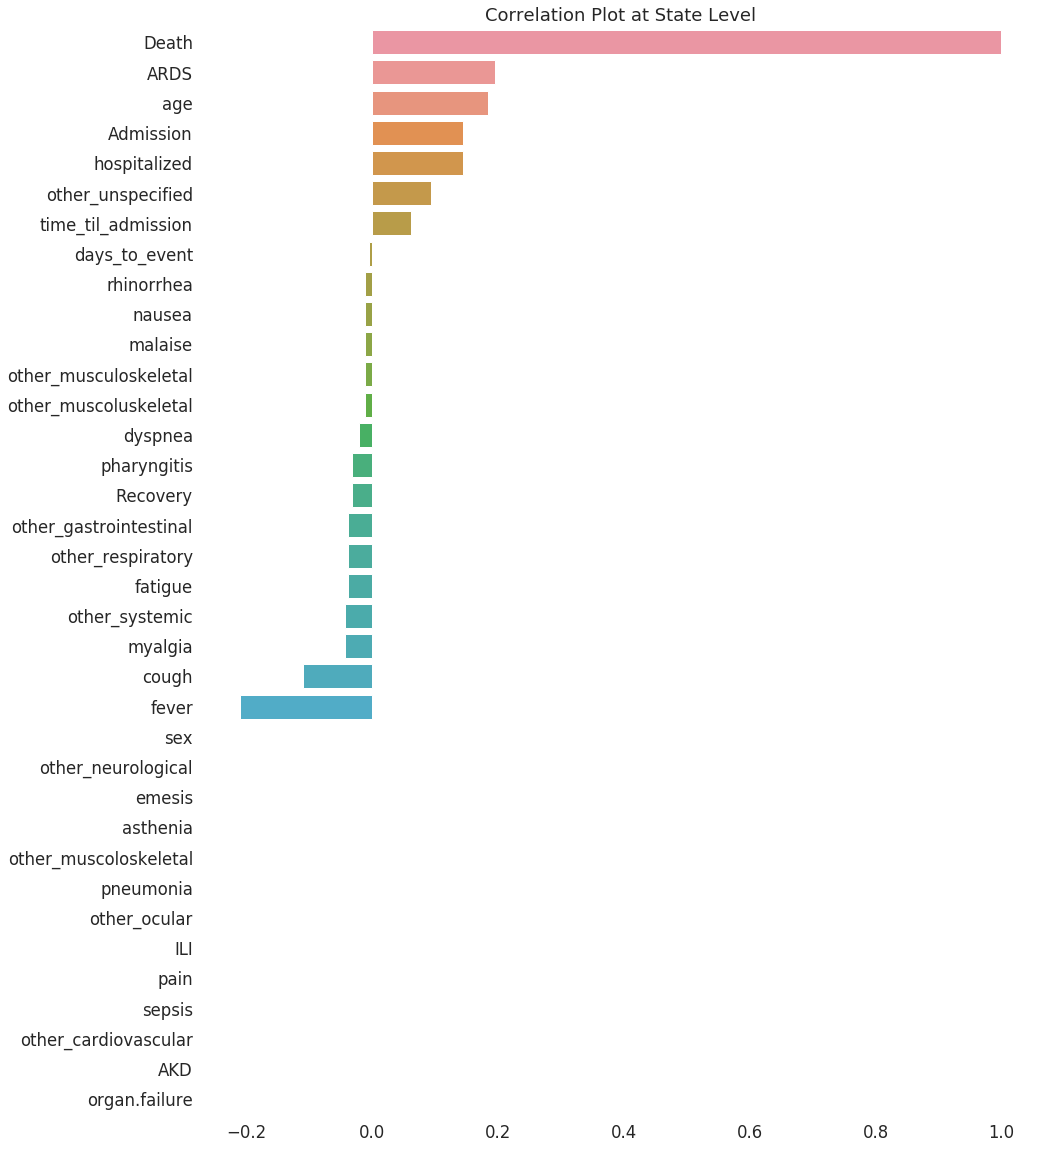

In [0]:
## Calcul de la corrélation entre les variables (features)
corr=pandas_df_dummy.corr(method='pearson')
corr=corr.sort_values(by=["Death"],ascending=False).iloc[0].sort_values(ascending=False)
plt.figure(figsize=(15,20))
sns.barplot(x=corr.values, y=corr.index.values);
plt.title("Correlation Plot at State Level")
display()

### III.	PREPARATION DES DONNEES

In [0]:
##variables  categorical, attribuer 1 pour male et 0 pour female 
mask_sex = {'male': 1, 'female': 0, 'NaN':0}


In [0]:
pandas_df_dummy = pandas_df_dummy.replace(mask_sex)
df = df.replace(mask_sex)

In [0]:
pandas_df_dummy.head()

,id,sex,age,other_unspecified,cough,fever,dyspnea,other_respiratory,fatigue,myalgia,other_neurological,emesis,other_systemic,other_gastrointestinal,asthenia,other_muscoloskeletal,pneumonia,rhinorrhea,pharyngitis,other_musculoskeletal,other_ocular,nausea,other_muscoluskeletal,malaise,ILI,pain,ARDS,sepsis,other_cardiovascular,AKD,organ.failure,days_to_event,hospitalized,Admission,Recovery,Death,time_til_admission
0,34,NaN,49.0,0,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,0.0,1000.0,0.013333,0.1,0.013333,0.0,0.013333,0,0.013333,0.0,0.0,0.02,0.0,0.0,0.0,0.0,24,1,1,1,0,4.0
1,60,NaN,15.0,0,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,0.0,1000.0,0.013333,0.1,0.013333,0.0,0.013333,0,0.013333,0.0,0.0,0.02,0.0,0.0,0.0,0.0,21,1,1,0,1,21.0
2,61,NaN,66.0,1,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,0.0,1000.0,0.013333,0.1,0.013333,0.0,0.013333,0,0.013333,0.0,0.0,0.02,0.0,0.0,0.0,0.0,10,1,1,0,1,6.0
3,62,NaN,48.0,0,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,0.0,1000.0,0.013333,0.1,0.013333,0.0,0.013333,0,0.013333,0.0,0.0,0.02,0.0,0.0,0.0,0.0,41,1,1,0,1,0.0
4,63,NaN,89.0,0,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,0.0,1000.0,0.013333,0.1,0.013333,0.0,0.013333,0,0.013333,0.0,0.0,0.02,0.0,0.0,0.0,0.0,6,1,1,0,1,5.0


In [0]:
#pandas_df_dummy = pandas_df_dummy.dropna()


def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [0]:
#clean_dataset(pandas_df_dummy)

pandas_df_dummy = pandas_df_dummy.fillna(method='ffill')

pandas_df_dummy[pandas_df_dummy==np.inf]=np.nan
pandas_df_dummy.fillna(pandas_df_dummy.mean(), inplace=True)


#clean_dataset(pandas_df_dummy)

df = df.fillna(method='ffill')
df[df==np.inf]=np.nan
df.fillna(df.mean(), inplace=True)

## Répartition de données en features X et Target Y

In [0]:
x = pandas_df_dummy.drop(['id', 'Death'], axis=1)

y = pandas_df_dummy['Death']

#x = x.values.astype(np.float)
#y = y.values.astype(np.float)

In [0]:
x.replace([np.inf, -np.inf], np.nan, inplace=True)
x.fillna(999999, inplace=True)

In [0]:
#x = x.dropna()

#np.isnan(x)  

#np.where(x.values >= np.finfo(np.float32).max)

Répartir les données en features x et y: la variable target

### Selection des variables

In [0]:
## Développer le modèle décision tree 
dt = DecisionTreeClassifier(max_depth=3)

In [0]:
dt.fit(x, y)

Out[64]: DecisionTreeClassifier(max_depth=3)

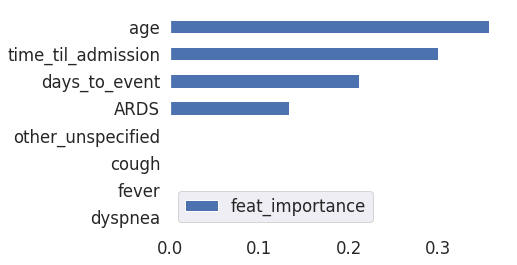

In [0]:
## Faire ressortir les 
dt_feat = pd.DataFrame(dt.feature_importances_, index=x.columns, columns=['feat_importance'])
dt_feat.sort_values('feat_importance').tail(8).plot.barh()
plt.show()


Feature importance est très important dans le domaine de  la modélisation machine learning. Il permet de comprendre quelles sont les variables qui contribuent le plus dans le modèle et aussi de pouvoir interpreter les résultats. 

Cette partie est cruciale car elle va permettre aux data scientist de pouvoir expliquer aisément les résultats. 
Les variables apparaissant dans les features importance : 


- Age est la variable la plus importante dans le modèle.

- time_til_admission : seconde variable 

- days_to_event : 

- ARDS

In [0]:


X = pandas_df_dummy.drop(['id', 'Death', 'age', 'time_til_admission', 'days_to_event'], axis=1)

Y = pandas_df_dummy['Death']

In [0]:
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(999999, inplace=True)

In [0]:
## Développer le modèle décision tree 
dt1 = DecisionTreeClassifier(max_depth=3)



In [0]:
dt1.fit(X, Y)

Out[69]: DecisionTreeClassifier(max_depth=3)

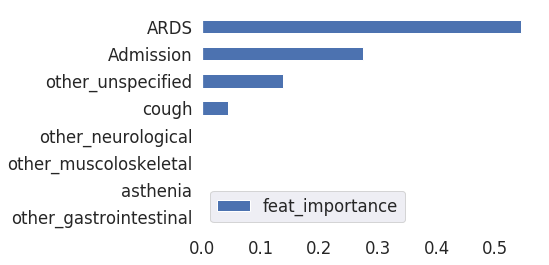

In [0]:
## Faire ressortir les 
dt_feat1 = pd.DataFrame(dt1.feature_importances_, index=X.columns, columns=['feat_importance'])
dt_feat1.sort_values('feat_importance').tail(8).plot.barh()
plt.show()



Feature importance est très important dans le domaine de  la modélisation machine learning. Il permet de comprendre quelles sont les variables qui contribuent le plus dans le modèle et aussi de pouvoir interpreter les résultats. 

Cette partie est cruciale car elle va permettre aux data scientist de pouvoir expliquer aisément les résultats. 
Les variables apparaissant dans les features importance : 
 

- ARDS 

- Admission 

- other_unspecified 

- cough

###  IV.	MODELISATION

#### Description du process de modélisation


Nous testerons dans cette section plusieurs modèles de classification tels les SVM, les methodes ensembles (RF, adaboost,...), Reseaux de neurones etc... dans l'objectif de choisir le meilleur modèle. Puis nous optimiserons les hyperparametres des modèles qui nous semblent les plus performants. Enfin nous generons les courbes d'apprentissage afn d'évaluer le niveau d'apprentissage de ces modèles pour verifer l'overfitting où  l'underfitting.

In [0]:
classifiers = {'Logistic Regression' : LogisticRegression(),
               'KNN': KNeighborsClassifier(),
               'Decision Tree': DecisionTreeClassifier(),
               'Random Forest': RandomForestClassifier(),
               'AdaBoost': AdaBoostClassifier(),
               'SVM': SVC()}

samplers = {'Random_under_sampler': RandomUnderSampler(),
            'Random_over_sampler': RandomOverSampler()}

drop_cols = ['id', 'dead', 'outcome2', 'outcome', 'time_til_recovery', 'time_til_death', 'age', 'time_til_admission', 'days_to_event']

In [0]:
def df_split(df, target='Death', drop_cols=drop_cols):
    df = df.drop(drop_cols, axis=1)
    df = df.fillna(999)
    x = df.drop(target, axis=1)
    y = df[target]    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)                          
    return x_train, x_test, y_train, y_test

def train_clfs(df, classifiers, samplers):
    
    x_train, x_test, y_train, y_test = df_split(df)
    
    names_samplers = []
    names_clfs = []
    results_train_cv_roc_auc = []
    results_train_cv_recall = []
    results_train_cv_accuracy = []
    results_test_roc_auc = []
    results_test_recall = []
    results_test_accuracy = []
    
    for name_sampler, sampler in samplers.items():
        print(f'Sampler: {name_sampler}\n')
        for name_clf, clf in classifiers.items():
            print(f'Classifier: {name_clf}\n')
            
            pipeline = Pipeline([('sampler', sampler),
                                 ('clf', clf)])
            
            cv_auc = cross_val_score(pipeline, x_train, y_train, cv=10, scoring='roc_auc') 
            cv_rec = cross_val_score(pipeline, x_train, y_train, cv=10, scoring='recall')                                
            cv_acc = cross_val_score(pipeline, x_train, y_train, cv=10, scoring='accuracy')        

            pipeline.fit(x_train, y_train)        
            y_pred = pipeline.predict(x_test)
            
            names_samplers.append(name_sampler)
            names_clfs.append(name_clf)
            results_train_cv_roc_auc.append(cv_auc)
            results_train_cv_recall.append(cv_rec)
            results_train_cv_accuracy.append(cv_acc)
            results_test_roc_auc.append(roc_auc_score(y_test, y_pred))
            results_test_recall.append(recall_score(y_test, y_pred))
            results_test_accuracy.append(accuracy_score(y_test, y_pred))

            print(f'CV\t-\troc_auc:\t{round(cv_auc.mean(), 3)}')
            print(f'CV\t-\trecall:\t\t{round(cv_rec.mean(), 3)}')
            print(f'CV\t-\taccuracy:\t{round(cv_acc.mean(), 3)}')

            print(f'Test\t-\troc_auc:\t{round(roc_auc_score(y_test, y_pred), 3)}')         
            print(f'Test\t-\trecall:\t\t{round(recall_score(y_test, y_pred), 3)}')          
            print(f'Test\t-\taccuracy:\t{round(accuracy_score(y_test, y_pred), 3)}')      
            print('\n<-------------------------->\n')

    df_results_test = pd.DataFrame(index=[names_clfs, names_samplers], columns=['ROC_AUC', 'RECALL', 'ACCURACY'])
    #df_results_test = pd.DataFrame(index=[names_clfs, names_samplers], columns=['RECALL', 'ACCURACY'])
    df_results_test['ROC_AUC'] = results_test_roc_auc
    df_results_test['RECALL'] = results_test_recall
    df_results_test['ACCURACY'] = results_test_accuracy

    return df_results_test

In [0]:
df_results_test = train_clfs(df, classifiers, samplers)

Sampler: Random_under_sampler

Classifier: Logistic Regression

CV	-	roc_auc:	0.749
CV	-	recall: 0.737
CV	-	accuracy:	0.696
Test	-	roc_auc:	0.845
Test	-	recall: 0.929
Test	-	accuracy:	0.765

<-------------------------->

Classifier: KNN

CV	-	roc_auc:	0.761
CV	-	recall: 0.247
CV	-	accuracy:	0.924
Test	-	roc_auc:	0.801
Test	-	recall: 0.714
Test	-	accuracy:	0.884

<-------------------------->

Classifier: Decision Tree

CV	-	roc_auc:	0.786
CV	-	recall: 0.79
CV	-	accuracy:	0.757
Test	-	roc_auc:	0.88
Test	-	recall: 1.0
Test	-	accuracy:	0.765

<-------------------------->

Classifier: Random Forest

CV	-	roc_auc:	0.797
CV	-	recall: 0.793
CV	-	accuracy:	0.722
Test	-	roc_auc:	0.88
Test	-	recall: 1.0
Test	-	accuracy:	0.765

<-------------------------->

Classifier: AdaBoost

CV	-	roc_auc:	0.791
CV	-	recall: 0.793
CV	-	accuracy:	0.712
Test	-	roc_auc:	0.875
Test	-	recall: 1.0
Test	-	accuracy:	0.755

<-------------------------->

Classifier: SVM

CV	-	roc_auc:	0.801
CV	-	recall: 0.11
CV	-	accuracy:	0.967
Test	-	roc_auc:	0.531
Test	-	recall: 0.071
Test	-	accuracy:	0.974

<-------------------------->

Sampler: Random_over_sampler

Classifier: Logistic Regression

CV	-	roc_auc:	0.777
CV	-	recall: 0.79
CV	-	accuracy:	0.693
Test	-	roc_auc:	0.863
Test	-	recall: 1.0
Test	-	accuracy:	0.732

<-------------------------->

Classifier: KNN

CV	-	roc_auc:	0.632
CV	-	recall: 0.053
CV	-	accuracy:	0.972
Test	-	roc_auc:	0.534
Test	-	recall: 0.071
Test	-	accuracy:	0.98

<-------------------------->

Classifier: Decision Tree

CV	-	roc_auc:	0.731
CV	-	recall: 0.717
CV	-	accuracy:	0.736
Test	-	roc_auc:	0.851
Test	-	recall: 0.929
Test	-	accuracy:	0.777

<-------------------------->

Classifier: Random Forest

CV	-	roc_auc:	0.739
CV	-	recall: 0.717
CV	-	accuracy:	0.737
Test	-	roc_auc:	0.851
Test	-	recall: 0.929
Test	-	accuracy:	0.777

<-------------------------->

Classifier: AdaBoost

CV	-	roc_auc:	0.773
CV	-	recall: 0.753
CV	-	accuracy:	0.722
Test	-	roc_auc:	0.882
Test	-	recall: 1.0
Test	-	accuracy:	0.768

<-------------------------->

Classifier: SVM

CV	-	roc_auc:	0.749
CV	-	recall: 0.09
CV	-	accuracy:	0.959
Test	-	roc_auc:	0.565
Test	-	recall: 0.143
Test	-	accuracy:	0.972

<-------------------------->

In [0]:
df.dtypes

Out[74]: id object
sex int64
age object
outcome object
other_unspecified int32
cough float64
fever float64
dyspnea float64
other_respiratory float64
fatigue float64
myalgia float64
other_neurological float64
emesis float64
other_systemic float64
other_gastrointestinal float64
asthenia float64
other_muscoloskeletal float64
pneumonia float64
rhinorrhea float64
pharyngitis float64
other_musculoskeletal float64
other_ocular float64
nausea float64
other_muscoluskeletal int32
malaise float64
ILI float64
pain float64
ARDS float64
sepsis float64
other_cardiovascular float64
AKD float64
organ.failure float64
days_to_event int32
dead int32
hospitalized int32
outcome2 object
Admission int32
Recovery int32
Death int32
time_til_admission object
time_til_recovery object
time_til_death object
dtype: object

In [0]:
#pandas_df_dummy = pandas_df_dummy.drop(['id','_c0', 'dead', 'outcome2', 'outcome', 'time_til_recovery', 'time_til_death'], axis=1)

df['sex'] = pd.to_numeric(df['sex'])
df['age'] = pd.to_numeric(df['age'])
df['hospitalized'] = pd.to_numeric(df['hospitalized'])
df['time_til_admission'] = pd.to_numeric(df['time_til_admission'])


df['time_til_recovery'] = pd.to_numeric(df['time_til_recovery'])
df['time_til_death'] = pd.to_numeric(df['time_til_death'])
#df



#### Hyperparameters tuning

In [0]:
def train_xgb(df, clf):
    
    x_train, x_test, y_train, y_test = df_split(df)

    scale_pos_weight = len(df[df['Death'] == 0]) / len(df[df['Death'] == 1])

    param_grid = {'xgb__max_depth': [3, 4, 5, 6, 7, 8],
                  'xgb__learning_rate': [0.01, 0.05, 0.1, 0.2],
                  'xgb__colsample_bytree': [0.6, 0.7, 0.8],
                  'xgb__min_child_weight': [0.4, 0.5, 0.6],
                  'xgb__gamma': [0, 0.01, 0.1],
                  'xgb__reg_lambda': [6, 7, 8, 9, 10],
                  'xgb__n_estimators': [150, 200, 300],
                  'xgb__scale_pos_weight': [scale_pos_weight]}

    rs_clf = RandomizedSearchCV(clf, param_grid, n_iter=100,
                                n_jobs=-1, verbose=2, cv=5,                            
                                scoring='roc_auc', random_state=42)

    rs_clf.fit(x_train, y_train)
    
    print(f'XGBOOST BEST PARAMS: {rs_clf.best_params_}')
    
    y_pred = rs_clf.predict(x_test)

    #df_results_xgb = pd.DataFrame(index=[['XGBoost'], ['No_sampler']], columns=['RECALL', 'ACCURACY'])
    df_results_xgb = pd.DataFrame(index=[['XGBoost'], ['No_sampler']], columns=['ROC_AUC', 'RECALL', 'ACCURACY'])

    df_results_xgb['ROC_AUC'] = roc_auc_score(y_test, y_pred)
    df_results_xgb['RECALL'] = recall_score(y_test, y_pred)
    df_results_xgb['ACCURACY'] = accuracy_score(y_test, y_pred)
    
    return df_results_xgb

In [0]:
df_results_xgb = train_xgb(df, xgb.XGBClassifier())

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 37 tasks | elapsed: 12.1s
[Parallel(n_jobs=-1)]: Done 158 tasks | elapsed: 46.0s
[Parallel(n_jobs=-1)]: Done 361 tasks | elapsed: 1.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 2.4min finished
[11:37:31] WARNING: ../src/learner.cc:516: 
Parameters: { xgb__colsample_bytree, xgb__gamma, xgb__learning_rate, xgb__max_depth, xgb__min_child_weight, xgb__n_estimators, xgb__reg_lambda, xgb__scale_pos_weight } might not be used.

 This may not be accurate due to some parameters are only used in language bindings but
 passed down to XGBoost core. Or some parameters are not used but slip through this
 verification. Please open an issue if you find above cases.


XGBOOST BEST PARAMS: {'xgb__scale_pos_weight': 53.333333333333336, 'xgb__reg_lambda': 7, 'xgb__n_estimators': 300, 'xgb__min_child_weight': 0.5, 'xgb__max_depth': 8, 'xgb__learning_rate': 0.01, 'xgb__gamma': 0, 'xgb__colsample_bytree': 0.6}

In [0]:
df_results = pd.concat([df_results_test, df_results_xgb])

### Evaluation des modèles

In [0]:

df_plot = pd.concat([df_results.sort_values('ROC_AUC', ascending=False).head(3), 
                     df_results.sort_values('RECALL', ascending=False).head(3),
                     df_results.sort_values('ACCURACY', ascending=False).head(3)])

In [0]:
def plot_test(df, xlim_min, xlim_max):

    f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,12))
    color = ['blue', 'red', 'green', 'yellow', 'orange', 'purple', 'navy', 'turquoise', 'darkorange']

    df['ROC_AUC'].plot(kind='barh', ax=ax1, xlim=(xlim_min, xlim_max), title='ROC_AUC', color=color)
    df['RECALL'].plot(kind='barh', ax=ax2, xlim=(xlim_min, xlim_max), title='RECALL', color=color)
    df['ACCURACY'].plot(kind='barh', ax=ax3, xlim=(xlim_min, xlim_max), title='ACCURACY', color=color)
    plt.show()

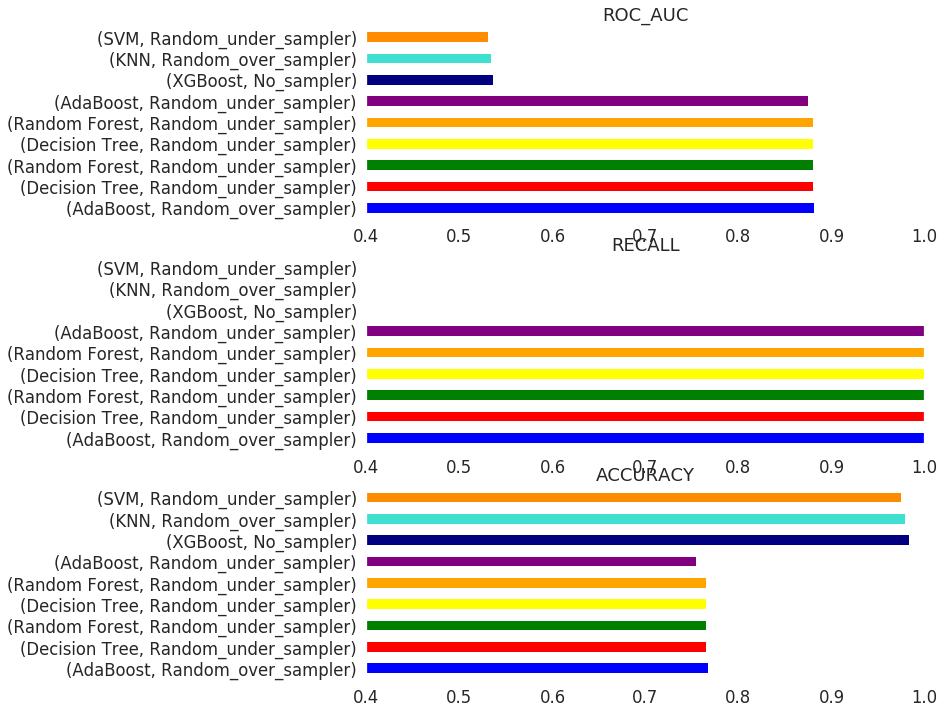

In [0]:
plot_test(df_plot, 0.4, 1)

*On peut constater que : 

- Pour le métrique : ROC-AUC 


     Les modèles (AdaBoost, Random_over_sampler),  (AdaBoost, Random_under_sampler),  (Logistic Regression, Random_over_sampler) présentent de beaux scores d'accuracy pour la courbe d'apprentissage comme pour la courbe de validation. 
    Mais nous risquerons d'être  en presence d'un cas d'over-fitting. 
    
- Pour Recall (Rappel)
    
    (AdaBoost, Random_over_sampler),  (AdaBoost, Random_under_sampler),  (Logistic Regression, Random_over_sampler) ont la valeur maximale de rappel et tend vers 1. 


- Pour l'accuracy 
    
  (SVM, Random_under_sampler),  (KNN, Random_over_sampler),  (XGBoost, No_sampler) ont les meilleurs scores  


Nos meilleurs modèles sont les suivants:

    - AdaBoost, Random_over_sampler
    
    - AdaBoost, Random_under_sampler 
    
    
    - Logistic Regression, Random_over_sampler

### Analyse de matrices de confusions à différents seuils de confiance

In [0]:
def plot_confusion_matrix(y_test, y_pred, title='Confusion matrix'):
    
    cm = confusion_matrix(y_test, y_pred)
    classes = ['Patient non décédé', 'Patient décédé']

    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues, )
    plt.title(title, fontsize=14)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def train_clf_threshold(pandas_df_dummy, clf, sampler=None):
    thresholds = np.arange(0.1, 1, 0.1)
    
    x_train, x_test, y_train, y_test = df_split(pandas_df_dummy)
    
    if sampler:
        clf_train = Pipeline([('sampler', sampler),
                              ('clf', clf)])
        
    else:        
        clf_train = clf
            
    clf_train.fit(x_train, y_train)
    y_proba = clf_train.predict_proba(x_test)
    
    plt.figure(figsize=(20,20))

    j = 1
    for i in thresholds:
        y_pred = y_proba[:,1] > i

        plt.subplot(4, 3, j)
        j += 1

        # Compute confusion matrix
        cnf_matrix = confusion_matrix(y_test,y_pred)
        np.set_printoptions(precision=2)

        print(f"Threshold: {round(i, 1)} | Test Accuracy: {round(accuracy_score(y_test, y_pred), 2)}| Test Recall: {round(recall_score(y_test, y_pred), 2)} | Test Roc Auc: {round(roc_auc_score(y_test, y_pred), 2)}")

        # Plot non-normalized confusion matrix
        plot_confusion_matrix(y_test, y_pred, title=f'Threshold >= {round(i, 1)}')

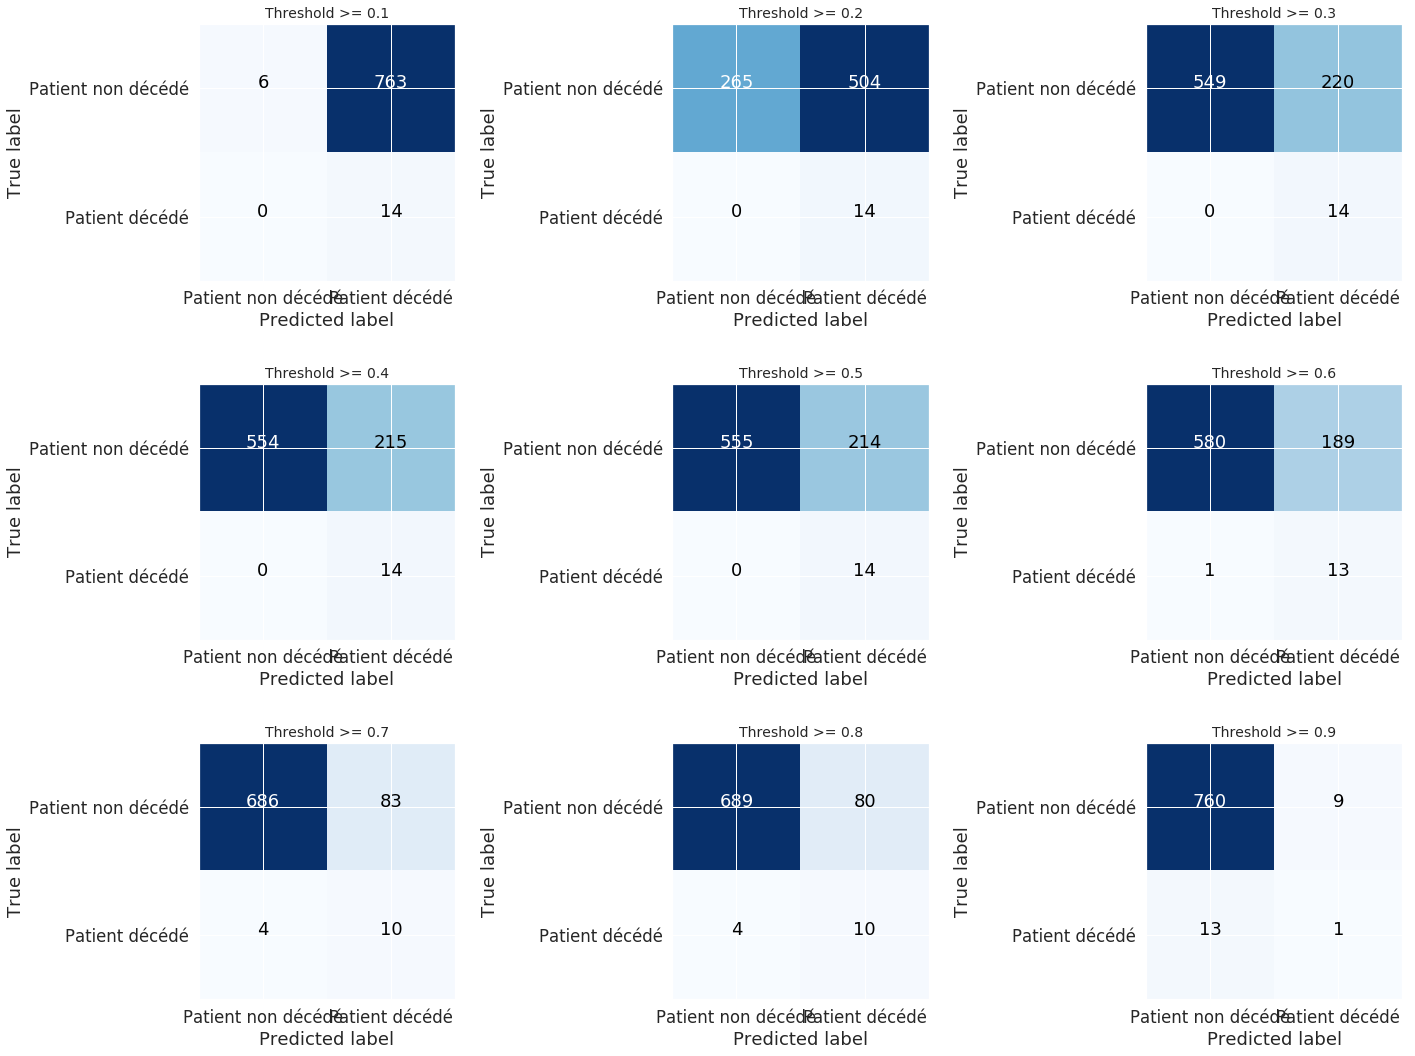

In [0]:
train_clf_threshold(df, RandomForestClassifier(), sampler=RandomUnderSampler())

In [0]:
## Seuil de confiance : 90%


TN = 753
FP = 16
FN = 11
TP = 3

##  la sensibilité est le ratio du nombre de vrai positifs par le nombre total d'éléments positifs (y compris ceux déclarés faux par erreur).
## La spécificité c'est le ratio du nombre de vrai négatifs par le nombre total d'élément négatifs (y compris ceux déclarés vrai par erreur).

##

sensitivity = TP / float(FN + TP)

print("Sensibilité : %.2f" %  sensitivity)

specificity = TN / (TN + FP)

print("Spécificité  : %.2f" %  specificity)

precision = TP / float(TP + FP)

print("Précision  : %.2f" % precision)

Sensibilité : 0.21
Spécificité : 0.98
Précision : 0.16

### Analyse de résultats

- Une Confusion Matrix (matrice de confusion) ou tableau de contingence est un outil permettant de mesurer les performances d’un modèle de Machine Learning en vérifiant notamment à quelle fréquence ses prédictions sont exactes par rapport à la réalité dans des problèmes de classification. 

 - A partir de la matrice de confusion, de métriques d'évaluation ont été extraites pour permettre l'analyse du modèle. 
 
 - Le rappel ("recall"  en anglais), ou sensibilité ("sensitivity" en anglais), est le taux de vrais positifs, c’est à dire la proportion de positifs que l’on a correctement identifiés. C’est la capacité de notre modèle à détecter tous les patients décédés. 21% 
 
 - la précision, c’est-à-dire la proportion de prédictions correctes parmi les points que l’on a prédits positifs. C’est la capacité de notre modèle à ne déclencher le traitement que pour un vrai malade potentiellement risqué c'est à dire pouvant décéder. 16% 
 
 - La spécificité ("specificity" en anglais), qui est le taux de vrais négatifs, autrement dit la capacité à détecter toutes les  situations où il n’y a pas de décès. C’est une mesure complémentaire de la sensibilité. 98%

### V.	CONCLUSION

####  Les résultats sont assez mitigé après ce premier entrainement. On peut noter les résultats :
- la classification  RandomForestClassifier de résultats encourangeants en terme de sensibilité, précision, et specificité. 


- le modèle AdaBoost pourrait être une alternativ

#### Prochaines étapes pour améliorer le modèle:


- Ajouter de nouvelles variables sur la base de nouvelles ingestions de bases de données plus historiques sur les patients. 

- Création, transformation et génération des nouvelles variables plus discriminantes.

- Tunner les hyperparamètres pour diminuer l'overfitting. 

- Ajouter d'autres critères d'évaluation des performances des algorithmes. 

- Itérer plusieurs modèles en fonction des produits